In [1]:
%matplotlib inline
from ExKMC.Tree import Tree
from sklearn.datasets import make_blobs
import gdown
import pandas as pd
import copy
from sklearn.cluster import KMeans
from utils import calc_cost, plot_kmeans, plot_tree_boundary,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from utils import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# input data
def getDataDrive(url, output,isImport=False):
    """
    return pandas dataframe
    """
    if isImport:
        gdown.download(url=url, output=output, quiet=False)
    res = pd.read_csv(output)
    return res

In [2]:
neg = getDataDrive(url='https://drive.google.com/uc?id=1ocidTn7jUvCrLG_XJ6H9MiNUDexCkjFG', output='negtive.csv')
pos = getDataDrive(url='https://drive.google.com/uc?id=1IyMPjACBkz96giGJ-Z4IMk-qzM-1CJ9G', output='positive.csv' )

X_neg = copy.deepcopy(neg)
X_pos = copy.deepcopy(pos)


In [3]:
##########???????
###input data ?
pos_target = [1 for _ in range(X_pos.shape[0])]
neg_target = [0 for _ in range(X_neg.shape[0])]

X_pos['y'] = pos_target
X_neg['y'] = neg_target

X__ = pd.concat([X_pos,X_neg])

# exclue name -> X_
X_ = X__.loc[:, X__.columns!='name']

# exclude label -> X
y = X_['y']
X = X_.loc[:, X_.columns!='y']

# data preprocess
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(normalized_df) 


In [4]:
X.shape

(41257, 696)

In [5]:
# teee_n
k = 2
n = X.shape[0]


kmeans = KMeans(k, random_state=42)
kmeans.fit(X)

p = kmeans.predict(X)
# tree_n = Tree(k, max_leaves=n)
# tree_n.fit(X, kmeans)

# plot_tree_boundary(tree_n, k, X, kmeans, plot_mistakes=True)

<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Cluster label', ylabel='True label'>

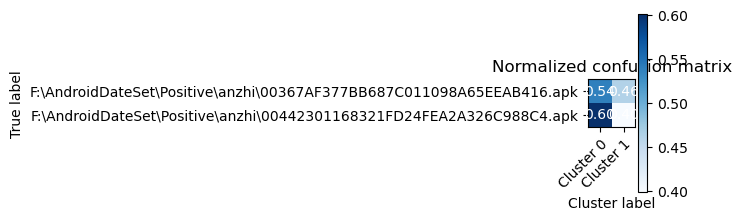

In [6]:
##########???????
plot_confusion_matrix(y, p, np.array(X__['name']), normalize=True)

In [7]:
# # visulization -> test with 2 
# from sklearn.decomposition import PCA
# pca = PCA(2)
# df = pca.fit_transform(X.to_numpy())

# kmeans_2 = KMeans(k, random_state=42)
# kmeans_2.fit(df)

# plot_kmeans(kmeans_2, x_data =df)

# tree_n = Tree(k)
# tree_n.fit(df, kmeans_2)

# plot_tree_boundary(tree_n, k, df, kmeans_2, plot_mistakes=True)

In [8]:
# Initialize tree with up to 6 leaves, predicting 3 clusters
tree = Tree(k=k,max_leaves=16*k)

# Construct the tree, and return cluster labels
# prediction = tree.fit_predict(X,kmeans)
tree.fit(X, kmeans)

# Tree plot saved to filename
tree.plot("test_16k",feature_names=list(X_.columns))